In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1.Select an area with a minimum size of 600 x 600 pixels and crop the “Sentinel2_BGRNIR.tif” image according to this area.

In [2]:
img = cv2.imread("Sentinel_2_BGRNIR.tif")
print(img.shape)

(1758, 2960, 3)


In [4]:
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
img = img[300:1100, 300:1100, :] #crop img 

In [6]:
cv2.imshow("image",img)
cv2.moveWindow("image", 400,0)
cv2.waitKey(0)
cv2.destroyAllWindows() #display cropped image

In [7]:
print(img.shape) #cropped image shape

(800, 800, 3)


In [56]:
cv2.imwrite("cropped_img.jpg",img)

True

# 2.Select a band from the above image and filter this band through a Python Code to be developed by yourself based on the “Subtraction” and “Mean Difference” convolution kernel filtering methods. Evaluate and comment on the results that you have achieved using both methods.

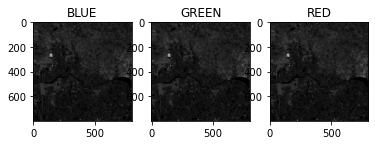

In [8]:
#split band from original image (R,G,B)
#display the band

img_Blue, img_Green, img_Red = cv2.split(img)

plt.subplot(1,3,1),plt.imshow(img_Blue,"gray"),plt.title("BLUE");
plt.subplot(1,3,2),plt.imshow(img_Green,"gray"),plt.title("GREEN");
plt.subplot(1,3,3),plt.imshow(img_Red,"gray"),plt.title("RED");
plt.show;

In [9]:
#mean filter(kernel)
mean_filter = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

In [10]:
#applying filter by using own funciton

def f_meanfilter(image,kernel):
    
    output=np.zeros_like(image)
    
    image_padded = np.zeros((image.shape[0]+2,image.shape[1]+2))
    image_padded[1:-1,1:-1] = image
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            
            output[y,x] = (1/9*kernel*image_padded[y:y+3,x:x+3]).sum() #1/9 mean , mean kernel is should dot by 1/9
            

    return output 

In [11]:
#applying mean filter to red band
BVmean=f_meanfilter(img_Red,mean_filter)
cv2.imshow("meanfiltertoimgred",BVmean)
cv2.moveWindow("meanfiltertoimgred", 400,0)
cv2.waitKey(0)
cv2.destroyAllWindows()

Subtraction Method: BVout = BVin - BVmean

In [12]:
BVout = img_Red-BVmean

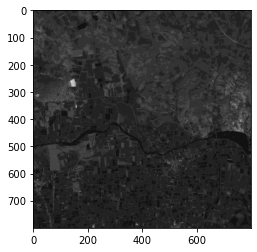

In [13]:
plt.imshow(BVout,"gray")

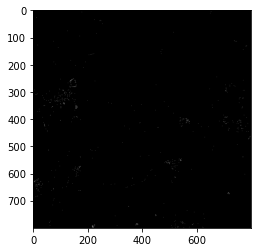

In [14]:
plt.imshow(BVmean,"gray")

In [15]:
#display the BVout
cv2.imshow("BVout",BVout)
cv2.moveWindow("BVout", 400,0)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
#display the BVmean
cv2.imshow("BVout",BVmean)
cv2.moveWindow("BVout", 400,0)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 3. Apply below filters on the same band that you selected above through a Python Code to be developed by yourself. Then, (i) combine the filtering results (Vertical + Horizontal + Diagonal (NW-SE) + Diagonal (NE-SW)) and (ii) extract the edges from the final filtered image by applying a threshold that you select.


In [19]:
#Vertical Horizontal Diagonalnwse and Diagonalnesw matrix

Vertical = np.array([[-1,0,1]
                    ,[-1,0,1]
                    ,[-1,0,1]])


Horizontal = np.array([[-1,-1,-1]
                       ,[0,0,0],
                       [1,1,1]])


Diagonal_NW_SE  = np.array([[0,1,1],
                    [-1,0,1],
                    [-1,-1,0]])


Diagonal_NE_SW = np.array([[1,1,0],
                    [1,0,-1],
                    [0,-1,-1]])

In [20]:
#applying filter by using own funciton
def f_filter(image,kernel):
    
    output=np.zeros_like(image)
    
    image_padded = np.zeros((image.shape[0]+2,image.shape[1]+2))
    image_padded[1:-1,1:-1] = image
    
    
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            
            output[y,x] = (kernel*image_padded[y:y+3,x:x+3]).sum()
            

    return output 

In [35]:
#applying kernel to red band 
image_vertical=f_filter(img_Red,Vertical)
cv2.imshow("verticaltoimg_Red",image_vertical)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
image_horizontal=f_filter(img_Red,Horizontal)
cv2.imshow("horizontaltoimg_Red",image_horizontal)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
image_NWSE=f_filter(img_Red,Diagonal_NW_SE)
cv2.imshow("Diagonal_NW_SEtoimg_Red",image_NWSE)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
image_NESW=f_filter(img_Red,Diagonal_NE_SW)
cv2.imshow("Diagonal_NE_SWtoimg_Red",image_NESW)
cv2.waitKey(0)
cv2.destroyAllWindows()

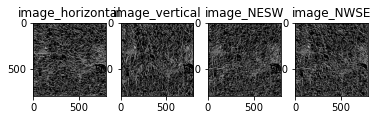

In [33]:
plt.subplot(1,4,1),plt.imshow(image_horizontal,"gray"),plt.title("image_horizontal");
plt.subplot(1,4,2),plt.imshow(image_vertical,"gray"),plt.title("image_vertical");
plt.subplot(1,4,3),plt.imshow(image_NESW,"gray"),plt.title("image_NESW");
plt.subplot(1,4,4),plt.imshow(image_NWSE,"gray"),plt.title("image_NWSE");
plt.show();

(İ)

In [36]:
#combined the all kernel
combined_kernel = image_horizontal+image_vertical+image_NESW+image_NWSE

In [37]:
#combined matrix
combined_kernel

array([[  5, 251, 250, ..., 251, 251, 241],
       [ 15, 255, 255, ...,   0,   0, 241],
       [ 15, 254, 254, ...,   0,   0, 241],
       ...,
       [ 11,   2,   0, ...,   0, 253, 244],
       [ 11,   1,   0, ...,   0, 253, 244],
       [ 12,   4,   4, ...,   4,   2, 251]], dtype=uint8)

In [40]:
#display comined img
cv2.imshow("combinedkerneltoimg_Red",combined_kernel)
cv2.waitKey(0)
cv2.destroyAllWindows()

(ii)

In [48]:
#The code is If the intensity of a pixel is greater than T ,the value of that pixel is set to 255 (white). Otherwise, the pixel value is set to 0 (black).
#applying threshold to combined_kernel

h = combined_kernel.shape[0]
w = combined_kernel.shape[1]

img_thres = np.zeros((h,w))

n_pix = 0
T = 150

for y in range(0,h):
    for x in range(0,w):
        pixel = combined_kernel[y,x]
        if pixel >= T:
            n_pix = 255
        else:
            n_pix = 0
            
        img_thres[y,x] = n_pix

cv2.imshow("img_thres_", img_thres)
cv2.waitKey(0)
cv2.destroyAllWindows()

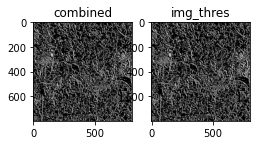

In [49]:
#display combined_kernel and img_thresh
plt.subplot(1,3,1),plt.imshow(combined_kernel,"gray"),plt.title("combined");
plt.subplot(1,3,2),plt.imshow(img_thres,"gray"),plt.title("img_thres");
plt.show;